# NLP - Detect sarcasm in article headline using tf.Keras 

<img src="https://eugeneyan.com/assets/experiment.png" width="500" height="300">


## Tokenizer

```
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = 100, lower=True)
tokenizer.fit_on_texts(sentences)
```



In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [
    'i love my dog',
    'I, love my cat',
    'You love my dog!',
    "you love MY Dog!"
]
tokenizer = Tokenizer(num_words = 100, lower=True)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'love': 1, 'my': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6}


In [2]:
word_index = tokenizer.word_index
print(word_index)

{'love': 1, 'my': 2, 'dog': 3, 'i': 4, 'you': 5, 'cat': 6}


## Sequencing 
### Padding

In Keras, this is specified via the “padding” argument on the Conv2D layer, which has the default value of ‘valid‘ (no padding). This means that the filter is applied only to valid ways to the input.



In [3]:
import tensorflow as tf
from tensorflow import keras


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = [
    'I love my dog',
    'I love my cat',
    'You love my dog!',
    'Do you think my dog is amazing?'
]

tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)
sequences

[[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]

In [4]:
padded = pad_sequences(sequences, maxlen=5)
print("\nWord Index = " , word_index)
print("\nSequences = " , sequences)
print("\nPadded Sequences:")
print(padded)


Word Index =  {'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}

Sequences =  [[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]

Padded Sequences:
[[ 0  5  3  2  4]
 [ 0  5  3  2  7]
 [ 0  6  3  2  4]
 [ 9  2  4 10 11]]


In [5]:
padded = pad_sequences(sequences, maxlen=None, padding='post')
print("\nWord Index = " , word_index)
print("\nSequences = " , sequences)
print("\nPadded Sequences:")
print(padded)


Word Index =  {'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}

Sequences =  [[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]

Padded Sequences:
[[ 5  3  2  4  0  0  0]
 [ 5  3  2  7  0  0  0]
 [ 6  3  2  4  0  0  0]
 [ 8  6  9  2  4 10 11]]


In [6]:
padded = pad_sequences(sequences, maxlen=6, padding='post', truncating='post')
print("\nWord Index = " , word_index)
print("\nSequences = " , sequences)
print("\nPadded Sequences:")
print(padded)


Word Index =  {'<OOV>': 1, 'my': 2, 'love': 3, 'dog': 4, 'i': 5, 'you': 6, 'cat': 7, 'do': 8, 'think': 9, 'is': 10, 'amazing': 11}

Sequences =  [[5, 3, 2, 4], [5, 3, 2, 7], [6, 3, 2, 4], [8, 6, 9, 2, 4, 10, 11]]

Padded Sequences:
[[ 5  3  2  4  0  0]
 [ 5  3  2  7  0  0]
 [ 6  3  2  4  0  0]
 [ 8  6  9  2  4 10]]


In [7]:
# Try with words that the tokenizer wasn't fit to
test_data = [
    'i really love my dog',
    'my dog loves my manatee',
    'my dog loves playing out'
]

test_seq = tokenizer.texts_to_sequences(test_data)
print("\nTest Sequence = ", test_seq)

padded = pad_sequences(test_seq, maxlen=10)
print("\nPadded Test Sequence: ")
print(padded)


Test Sequence =  [[5, 1, 3, 2, 4], [2, 4, 1, 2, 1], [2, 4, 1, 1, 1]]

Padded Test Sequence: 
[[0 0 0 0 0 5 1 3 2 4]
 [0 0 0 0 0 2 4 1 2 1]
 [0 0 0 0 0 2 4 1 1 1]]


## Tensorflow Keras 

In [8]:
# Run this to ensure TensorFlow 2.x is used
try:
# %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [9]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [11]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json


--2022-01-27 11:02:41--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 2607:f8b0:4023:c0b::80
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  22.4MB/s    in 0.2s    

2022-01-27 11:02:42 (22.4 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [12]:
with open("/tmp/sarcasm.json", 'r') as f:
    datastore = json.load(f)

In [13]:
datastore[0]['headline']

"former versace store clerk sues over secret 'black code' for minority shoppers"

In [14]:
sentences = []
labels = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [15]:
sentences[0]

"former versace store clerk sues over secret 'black code' for minority shoppers"

In [16]:
len(sentences)

26709

### Train Test split

In [17]:
# Slicing 0 to 20K index as training sentences
training_sentences = sentences[0:training_size]
# Slicing 20K to end index as testing sentences
testing_sentences = sentences[training_size:]
# Slicing 20K to end index as testing sentences
training_labels = labels[0:training_size]
# Slicing 0 to 20K index as training sentences
testing_labels = labels[training_size:]

In [18]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index
len(word_index)

25637

In [22]:
word_index['chicken']

957

Convert to sequence and pad the sequences

In [19]:
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [20]:
testing_padded.shape

(6709, 100)

In [21]:
type(testing_padded)

numpy.ndarray

In [23]:
testing_padded[0]

array([   1, 1100, 6663, 9423,   30,    1, 2439,    5,  519,  109,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0], dtype=int32)

### Model

Convert to from tfnp array

In [27]:
type(training_padded)

numpy.ndarray

In [28]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [29]:
type(training_padded)

numpy.ndarray

### Define NLP Model

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Define epochs and fit the model
num_epochs = 20
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/40
625/625 - 3s - loss: 0.6680 - accuracy: 0.5732 - val_loss: 0.6054 - val_accuracy: 0.6737 - 3s/epoch - 5ms/step
Epoch 2/40
625/625 - 3s - loss: 0.4619 - accuracy: 0.8131 - val_loss: 0.4067 - val_accuracy: 0.8272 - 3s/epoch - 5ms/step
Epoch 3/40
625/625 - 2s - loss: 0.3206 - accuracy: 0.8767 - val_loss: 0.3563 - val_accuracy: 0.8530 - 2s/epoch - 3ms/step
Epoch 4/40
625/625 - 2s - loss: 0.2653 - accuracy: 0.8985 - val_loss: 0.3447 - val_accuracy: 0.8580 - 2s/epoch - 3ms/step
Epoch 5/40
625/625 - 2s - loss: 0.2276 - accuracy: 0.9137 - val_loss: 0.3451 - val_accuracy: 0.8580 - 2s/epoch - 3ms/step
Epoch 6/40
625/625 - 2s - loss: 0.2004 - accuracy: 0.9238 - val_loss: 0.3501 - val_accuracy: 0.8560 - 2s/epoch - 3ms/step
Epoch 7/40
625/625 - 2s - loss: 0.1786 - accuracy: 0.9334 - val_loss: 0.3632 - val_accuracy: 0.8520 - 2s/epoch - 4ms/step
Epoch 8/40
625/625 - 2s - loss: 0.1611 - accuracy: 0.9400 - val_loss: 0.3745 - val_accuracy: 0.8539 - 2s/epoch - 4ms/step
Epoch 9/40
625/625 - 2s 

Visualize the model accuracy and loss

Plotting accuracy plot


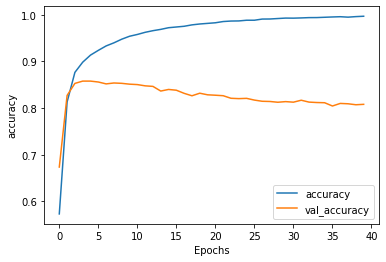

Plotting loss plot


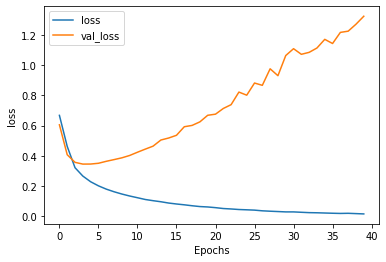

In [39]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

print("Plotting accuracy plot")  
plot_graphs(history, "accuracy")
print("Plotting loss plot")  
plot_graphs(history, "loss")

In [40]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_sentences[2])
print(labels[2])

former <OOV> store clerk sues over secret 'black <OOV> for minority shoppers ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
mom starting to fear son's web series closest thing she will have to grandchild
1


In [42]:
e = model.layers[0]
print(e)
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 16)


In [43]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [44]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [45]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[8.477951e-01]
 [6.598463e-08]]
